<h2><center> Welcome! Prediction of Medical Expenses: Data Source NHIF</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1hSOAfRhJ_jo-MZAjq81VYJu5bZNL7EjD" width = "800" height = '500'/>

*About the problem*
> The aim of this project is to anticipate the healthcare costs of NHIF insurance company's users by analyzing their demographic information, insurance details, age, and other relevant factors. This will enable us to gain insight into the amount they spend on medical services.

*Objective of this challenge*
> TThe goal of this challenge is to develop a machine learning or deep learning model utilizing NHIF data that can accurately forecast the medical expenses that NHIF users are likely to incur.

The proposed solutions will provide NHIF, governments, private equity firms, and other stakeholders with the ability to estimate healthcare costs and monitor the long-term health of individuals.

## Columns in Dataset

1. S/n: This indicates the number of individuals( 576 Childrens ) in the Dataset
2. Gender: The type of gender this indicates male and female in the dataset.
3. Category: This is the type of the hospital/Clinic/Dipensary tha a patient takes services.
4. Ownership: This indicates who owns the hospital faith based, public or private.
5. Age: This indicates how old are the Kids. 
6. Region: Thsi indicates the places where childresn data we taken
7. Visits Jul 21: It indicate number of times a patient use/visit the center in 2021
8. Amount Paid Jul 21 : It indicate amount paid by every child for service in 2021
9. Visits Jul 22: It indicate number of times a patient use/visit the center in 2022.
10. Amount Paid Jul 22: It indicate amount paid by every child for service in 2022

## Table of contents:

1. [Installing and importing libraries](#Libraries)
2. [Feature Engineering](#Data)
3. [Statistical summaries](#Statistics)
4. [Outliers](#Outliers)
5. [Geo Visualisation - EDA](#Geo)
5. [Missing values and duplicates](#Missing)
6. [Date features EDA](#Dates)
7. [Correlations - EDA](#Correlations)
9. [Timeseries visualization - EDA](#Timeseries)
10. [Feature engineering](#Engineering)
11. [Modelling](#Modelling)
12. [Making predictions of the test set](#Predictions)

### 1. Import Library & reading dataset [Libraries]

In [28]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import os


#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# To save the model
import joblib

#Modeling Libraries.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Importing Visualization Plot Settings - This is used to set the size, visual style, plot style and color pallete.

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

Load the dataset from my local machine.

In [30]:
DATA_PATH = 'D:/Projects/CLIENTS/Toto Afya/'
df = pd.read_excel(os.path.join(DATA_PATH, 'TOTO AFYA-MBEYA 2.xlsx'))


### 2. Statistical Summary

Number of Rows and Number of Columns.

In [31]:
print("Number of Rows: ", df.shape[0], "  ", 'Number of Columns:', df.shape[1])

Number of Rows:  574    Number of Columns: 10


Visulization of the first five rows of the Dataframe.

In [32]:
df.head()

,S/n,Gender,Age,Category,Ownership,Region,Visits Jul 21,Amount Paid Jul 21,Visits Jul 22,Amount Paid Jul 22
0,1,Female,4,Specialized Clinic (Polyclinic),Private,Temeke,1,28000,1,11600
1,2,Male,4,Specialized Clinic (Polyclinic),Private,Ilala,1,31950,2,46960
2,3,Male,4,Health Centre,Faith Based,Morogoro,1,5350,1,3900
3,4,Male,4,Dispensary,Private,Unguja,1,10100,3,18460
4,5,Male,9,Zonal Referral Hospital,Faith Based,Kilimanjaro,2,61000,3,49700


Visulization of the summary of the dataframe structure to understand dataframe composition.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S/n                 574 non-null    int64 
 1   Gender              574 non-null    object
 2   Age                 574 non-null    int64 
 3   Category            574 non-null    object
 4   Ownership           574 non-null    object
 5   Region              574 non-null    object
 6   Visits Jul 21       574 non-null    int64 
 7   Amount Paid Jul 21  574 non-null    int64 
 8   Visits Jul 22       574 non-null    int64 
 9   Amount Paid Jul 22  574 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 45.0+ KB


### 3. NUMERICAL ANALYSIS

#### 3.1 Numeric Approach - Describing the data

Data sampling

In [34]:
df.sample(10)

,S/n,Gender,Age,Category,Ownership,Region,Visits Jul 21,Amount Paid Jul 21,Visits Jul 22,Amount Paid Jul 22
2,3,Male,4,Health Centre,Faith Based,Morogoro,1,5350,1,3900
558,588,Female,7,District Hospital,Private,Temeke,1,8000,3,109680
222,235,Male,8,District Hospital,Private,Temeke,1,9100,1,4400
325,343,Male,12,Zonal Referral Hospital,Private,Kinondoni,1,20750,3,111300
227,240,Female,3,Zonal Referral Hospital,Private,Kinondoni,2,74750,1,41000
110,116,Male,7,Regional Referral Hospital,Faith Based,Singida,1,19000,1,44000
65,67,Male,5,Regional Referral Hospital,Private,Kinondoni,1,35500,1,65600
287,303,Male,7,Dispensary,Private,Kinondoni,1,7700,1,15100
275,291,Male,8,District Hospital,Private,Temeke,1,9600,1,7300
31,32,Male,5,Specialized Clinic (Polyclinic),Faith Based,Temeke,1,26700,1,11000


What are the numerical and categorical features

In [37]:
cats = ['Gender', 'Category', 'Ownership', 'Region']
nums = ['Age', 'Visits Jul 21', 'Amount Paid Jul 21','Visits Jul 22','Amount Paid Jul 22']

Describe Categorical Values.

In [38]:
df[cats].describe(include='all')

,Gender,Category,Ownership,Region
count,574,574,574,574
unique,2,9,3,23
top,Male,Dispensary,Private,Kinondoni
freq,311,119,442,233


Describe Numerical Values.

In [ ]:
df[nums].describe(include='all')

,Age,Visits Jul 21,Amount Paid Jul 21,age_group,Area_Type,Visits Jul 22,Amount Paid Jul 22
count,574.000000,574.000000,574.000000,574,574,574.000000,574.000000
unique,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,School-age children: 6-12,Urban,NaN,NaN
freq,NaN,NaN,NaN,253,358,NaN,NaN
mean,7.898955,1.329268,36481.672474,NaN,NaN,1.496516,35758.040070
std,3.535445,0.784635,70342.756962,NaN,NaN,1.157337,51451.268525
min,3.000000,1.000000,1000.000000,NaN,NaN,1.000000,1000.000000
25%,5.000000,1.000000,10912.500000,NaN,NaN,1.000000,10800.000000
50%,7.000000,1.000000,20130.000000,NaN,NaN,1.000000,21525.000000
75%,10.000000,1.000000,35000.000000,NaN,NaN,2.000000,41000.000000


Check How many people per each gender?

In [ ]:
df.groupby(['Gender'])['Age'].count()

Gender
Female    263
Male      311
Name: Age, dtype: int64

Check How many childs in each same age?

In [ ]:
df.groupby(['Age'])['Gender'].count()

Age
3       3
4      82
5     103
6      78
7      52
8      48
9      52
10     31
11     27
12     22
13     21
14     17
15      7
16     16
17     15
Name: Gender, dtype: int64

What is the number of hospital categories used?

In [40]:
df_category = df.groupby(['Category'])['Ownership'].count()
df_category

Category
Dispensary                         119
District Hospital                  109
Health Centre                       22
National Referral Hospital          24
Pharmacy                            10
Regional Referral Hospital          78
Specialized Clinic (Polyclinic)    118
Specialized Clinics                  8
Zonal Referral Hospital             86
Name: Ownership, dtype: int64

Check How many Health centers per owneship that involved.

In [42]:

df_ownership = df.groupby(['Ownership'])['Category'].count()
df_ownership


Ownership
Faith Based     99
Government      33
Private        442
Name: Category, dtype: int64

Check How many patients per region.

In [43]:
df_region = df.groupby(['Region'])['Ownership'].count()
df_region

Region
Arusha          11
Dodoma           5
Geita           22
Ilala           57
Iringa           5
Kagera           2
Kigoma           1
Kilimanjaro     31
Kinondoni      233
Mara             1
Mbeya           19
Morogoro         9
Mwanza          45
Njombe           4
Pwani           10
Rukwa            1
Shinyanga        3
Singida          3
Songwe           3
Tabora           6
Tanga            9
Temeke          68
Unguja          26
Name: Ownership, dtype: int64

Check Number of visits in each data given in 2021.

In [44]:
df_visits21 = df.groupby(['Visits Jul 21'])['Amount Paid Jul 21'].count()
df_visits21

Visits Jul 21
1    442
2    102
3     17
4      7
5      3
7      1
8      2
Name: Amount Paid Jul 21, dtype: int64

Check number of visits for each patients in 2022.

In [ ]:
df.groupby(['Visits Jul 22']).sum()


,S/n,Age,Visits Jul 21,Amount Paid Jul 21,Amount Paid Jul 22
Visits Jul 22,,,,,
1,118273,3223,511,14773845,8937165
2,35419,873,144,3660715,4762115
3,12688,281,59,1271100,3684485
4,4454,94,28,708050,1808105
5,1207,38,13,283420,440870
9,596,13,5,136750,305930
10,159,7,1,45000,248000
17,431,5,2,61600,338445


What is the amount paid in 2021?  | What was the minimum and maximum amount paid?

In [45]:
df_paid21 = df.groupby(['Amount Paid Jul 21'])['Visits Jul 21'].count()
df_paid21


Amount Paid Jul 21
1000      1
1400      1
1500      1
2000      1
2250      1
         ..
435160    1
522240    1
649600    1
653250    1
775000    1
Name: Visits Jul 21, Length: 427, dtype: int64

What is the total amount paid in 2021?

In [46]:
total = df['Amount Paid Jul 21'].sum()
print('Amount of Money Paid in 2021 was : ',total)

Amount of Money Paid in 2021 was :  20940480


What was the total number of visits in 2021?

In [47]:
total = df['Visits Jul 21'].sum()
print('Total Visits in 2021 was : ',total)

Total Visits in 2021 was :  763


What was the amount paid in 2022?  |  What was the minimum and maximum amount paid in 2021?

In [108]:
df_paid22 = df.groupby(['Amount Paid Jul 22'])['Visits Jul 22'].count()
df_paid22

Amount Paid Jul 22
1000      1
2000      1
3000      2
3500      1
3600      1
         ..
331110    1
338445    1
416005    1
489925    1
597220    1
Name: Visits Jul 22, Length: 454, dtype: int64

What was the total amount paid in 2022?

In [48]:
total = df['Amount Paid Jul 22'].sum()
print('Amount of Money Paid in 2022 was : ', total)

Amount of Money Paid in 2022 was :  20525115


What was the total number of visits in 2022?

In [49]:
total = df['Visits Jul 22'].sum()
print('Total Visits in 2022 was : ',total)

Total Visits in 2022 was :  859


What was the amount paid per each number of visit in 2021?

In [87]:
Visits_VS_Amount21 = df.groupby(['Visits Jul 21']).agg({'Amount Paid Jul 21' : sum}).reset_index()
Visits_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Visits Jul 21,Amount Paid Jul 21
0,1,9319230
1,2,6940140
2,3,2085960
3,4,1066740
4,5,853000
6,8,465410
5,7,210000


What was the amount paid per each number of visit in 2022?

In [89]:
Visits_VS_Amount22 = df.groupby(['Visits Jul 22']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Visits_VS_Amount22.sort_values(['Amount Paid Jul 22'], ascending = False)

,Visits Jul 22,Amount Paid Jul 22
0,1,8937165
1,2,4762115
2,3,3684485
3,4,1808105
4,5,440870
7,17,338445
5,9,305930
6,10,248000


What was the amount paid per each region in 2021?

In [90]:
region_VS_Amount21 = df.groupby(['Region']).agg({'Amount Paid Jul 21' : sum}).reset_index()
region_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Region,Amount Paid Jul 21
8,Kinondoni,11439235
7,Kilimanjaro,2121300
21,Temeke,1290770
3,Ilala,1092070
2,Geita,1074480
12,Mwanza,1032960
22,Unguja,714860
20,Tanga,536475
10,Mbeya,398520
0,Arusha,305410


What was the amount paid per each region in 2022?

In [92]:
Region_VS_Amount = df.groupby(['Region']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Region_VS_Amount.sort_values(['Amount Paid Jul 22'], ascending = False)

,Region,Amount Paid Jul 22
8,Kinondoni,10263995
7,Kilimanjaro,1616465
21,Temeke,1573335
22,Unguja,1498360
2,Geita,1249115
3,Ilala,1066485
12,Mwanza,1008680
10,Mbeya,407855
0,Arusha,335420
20,Tanga,279430


What was the amount paid per each age in the dataset?

In [93]:
Age_VS_Amount21 = df.groupby(['Age']).agg({'Amount Paid Jul 21' : sum}).reset_index()
Age_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Age,Amount Paid Jul 21
2,5,4232590
3,6,2635675
4,7,2319460
6,9,2127400
1,4,1996350
5,8,1751445
7,10,1079380
9,12,966860
14,17,772170
8,11,741080


What was the amount paid per each age in 2022?

In [94]:
Age_VS_Amount22 = df.groupby(['Age']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Age_VS_Amount22.sort_values(['Amount Paid Jul 22'], ascending = False)

,Age,Amount Paid Jul 22
2,5,3585105
3,6,2522265
1,4,2444915
4,7,2392760
6,9,2200150
5,8,1395215
9,12,1207835
7,10,1119235
8,11,835290
13,16,770610


What was the amount paid per each gender in 2021?

In [95]:
Gender_VS_Amount21 = df.groupby(['Gender']).agg({'Amount Paid Jul 21' : sum}).reset_index()
Gender_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Gender,Amount Paid Jul 21
1,Male,12043285
0,Female,8897195


What was the amount paid per each gender in 2022?

In [97]:
Gender_VS_Amount22 = df.groupby(['Gender']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Gender_VS_Amount22.sort_values(['Amount Paid Jul 22'], ascending = False)

,Gender,Amount Paid Jul 22
1,Male,11428585
0,Female,9096530


What was the amount paid per each ownership om 2021?

In [98]:
Ownership_VS_Amount21 = df.groupby(['Ownership']).agg({'Amount Paid Jul 21' : sum}).reset_index()
Ownership_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Ownership,Amount Paid Jul 21
2,Private,13027745
0,Faith Based,4625195
1,Government,3287540


What was the amount paid per each ownership in 2022?

In [99]:
Ownership_VS_Amount22 = df.groupby(['Ownership']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Ownership_VS_Amount22.sort_values(['Amount Paid Jul 22'], ascending = False)

,Ownership,Amount Paid Jul 22
2,Private,15460315
0,Faith Based,4076375
1,Government,988425


#### 3.2 Visual Approach - Describing the data!

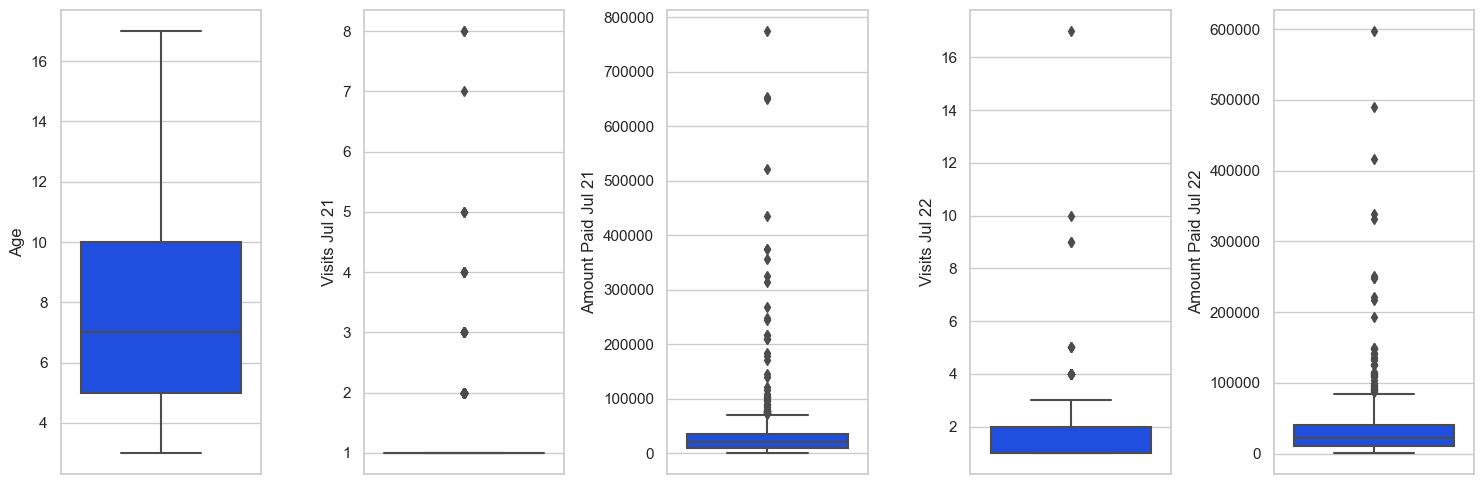

In [50]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

COMMENTS: 
- Data has a lot of outliers means they are not well distributed there is a lot of single points out of the mean!
- Most of the visits were aged between 5 to 10 
- Most visits in 2021 visited only once.
- In 2021 most people pay the money below half of 100,000 Tsh
-  Visis in 2022 the mean was between 1 to 2 there some outliers out above 2 
- The mean for the payment in 2022 ws also below half of 100,000 Tsh.

What is the number of each gender in the dataset?  |  Who were many against others?

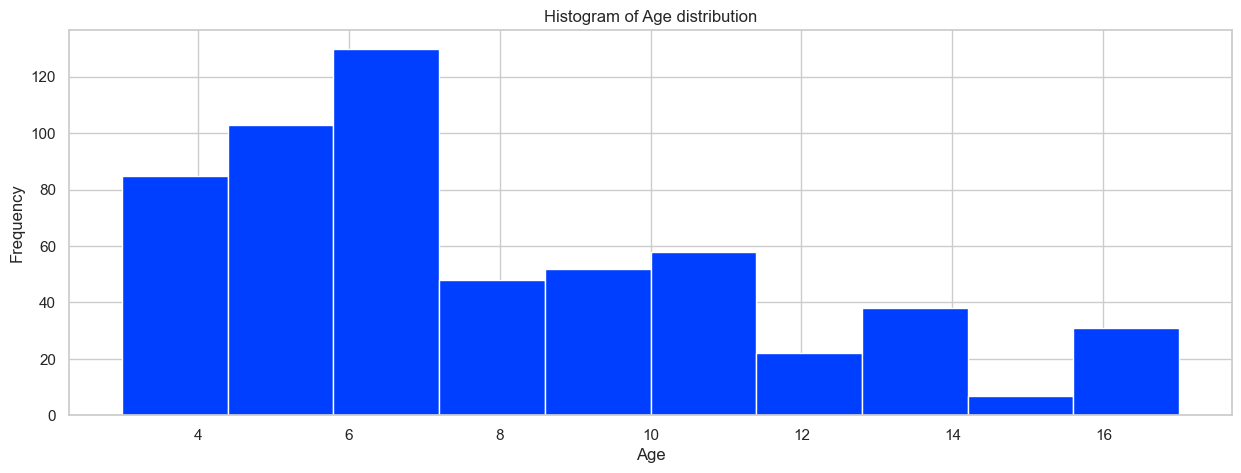

In [53]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.title('Histogram of Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

What was the amount of each data in ownership that involved for each children in dataset?

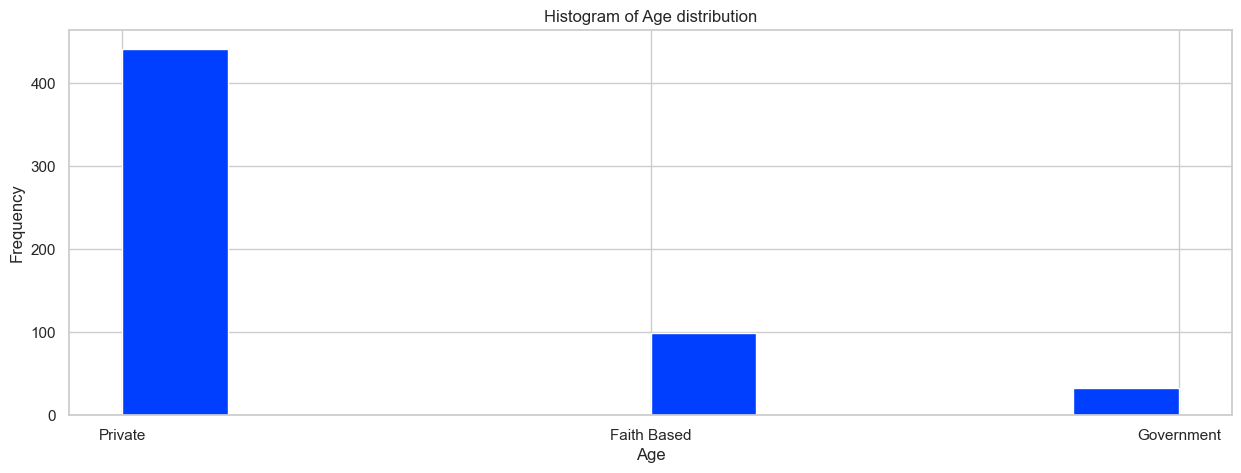

In [54]:
import matplotlib.pyplot as plt

plt.hist(df['Ownership'])
plt.title('Histogram of Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

What was the contribution for each center in the category in our dataset?

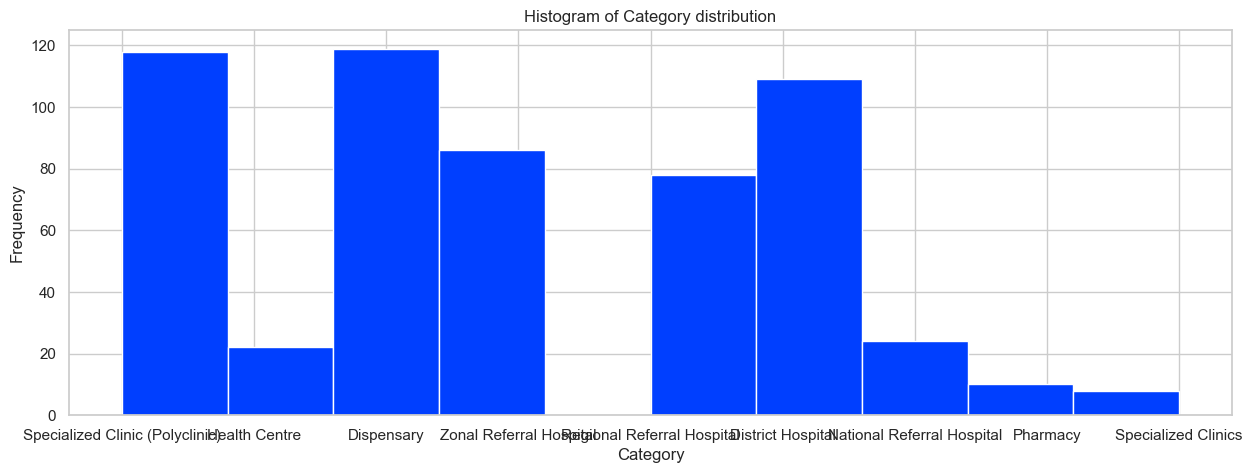

In [56]:
import matplotlib.pyplot as plt

plt.hist(df['Category'])
plt.title('Histogram of Category distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

What was the distribution of region in the dataset?

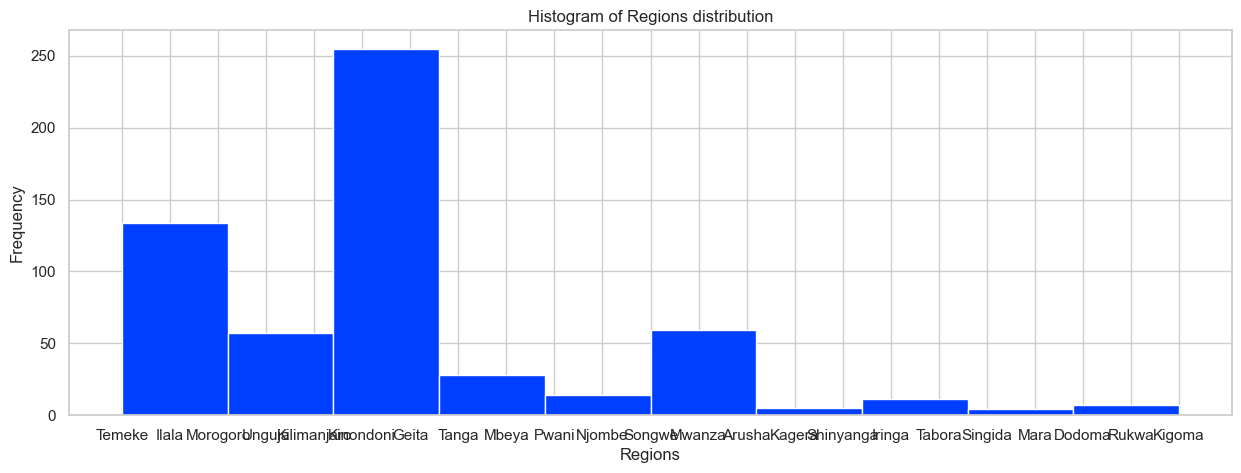

In [58]:
import matplotlib.pyplot as plt

plt.hist(df['Region'])
plt.title('Histogram of Regions distribution')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

Comment:
- Kindondoni, Temeke, Ilala contribute more than one-third any other regions in the dataset.

What was the distribution of visits in dataset in 2021?

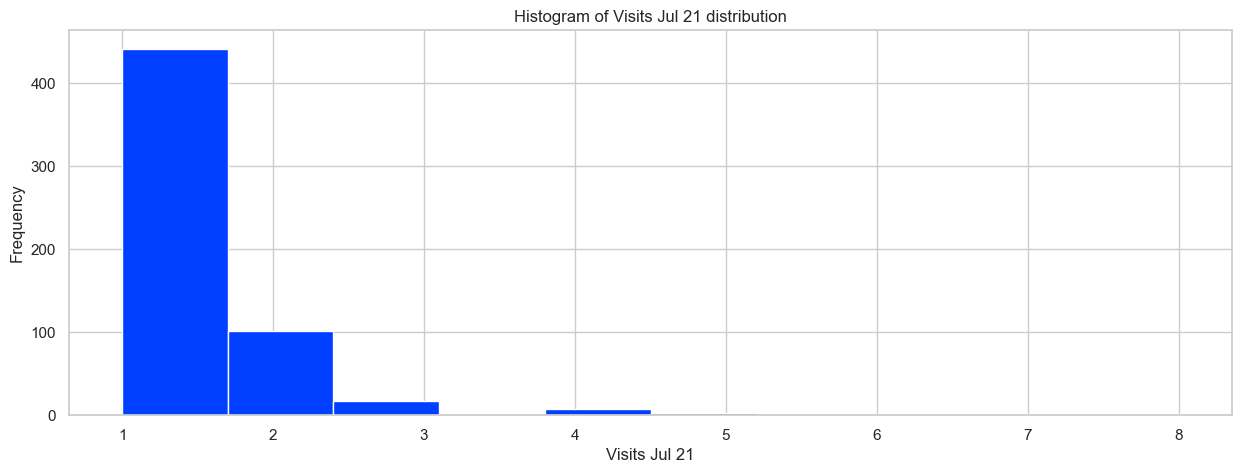

In [61]:
import matplotlib.pyplot as plt

plt.hist(df['Visits Jul 21'])
plt.title('Histogram of Visits Jul 21 distribution')
plt.xlabel('Visits Jul 21')
plt.ylabel('Frequency')
plt.show()

What was the payment distribution in 2021 between the minimum and maximum amount in 2021?

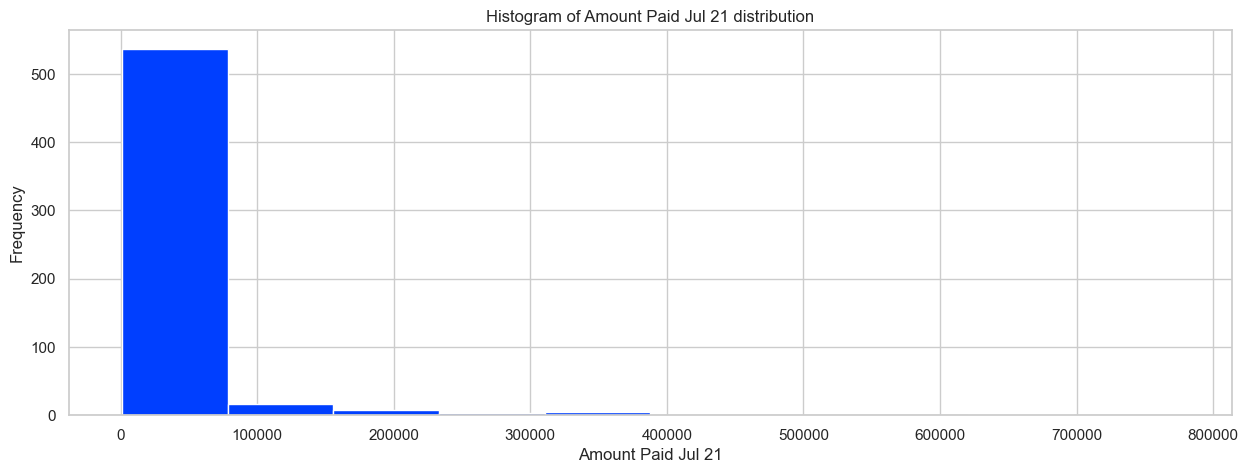

In [63]:
import matplotlib.pyplot as plt

plt.hist(df['Amount Paid Jul 21'])
plt.title('Histogram of Amount Paid Jul 21 distribution')
plt.xlabel('Amount Paid Jul 21')
plt.ylabel('Frequency')
plt.show()

What was the distribution of visits in dataset in 2022?

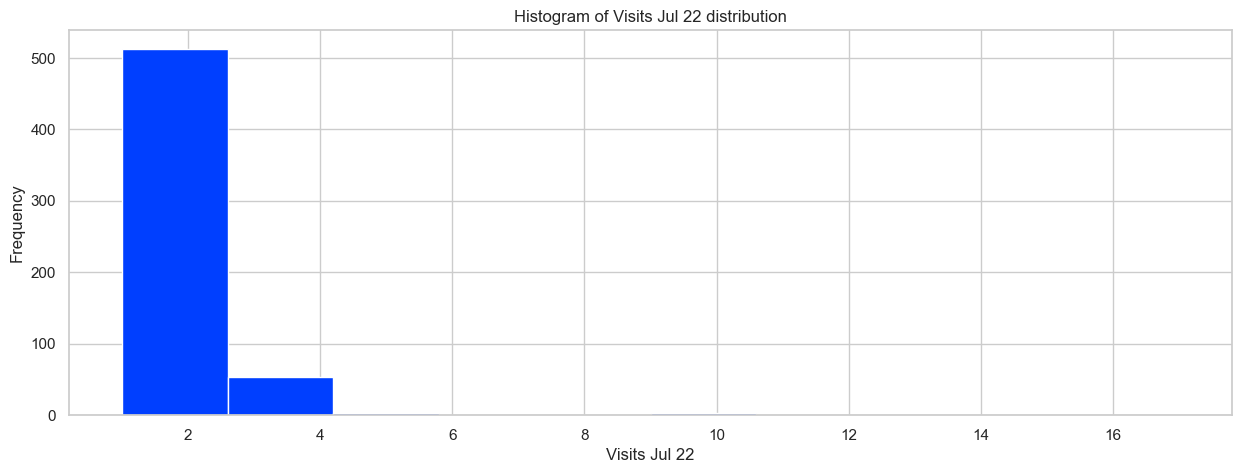

In [65]:
import matplotlib.pyplot as plt

plt.hist(df['Visits Jul 22'])
plt.title('Histogram of Visits Jul 22 distribution')
plt.xlabel('Visits Jul 22')
plt.ylabel('Frequency')
plt.show()

What was the payment distribution in 2022 between the minimum and maximum amount in 2022?

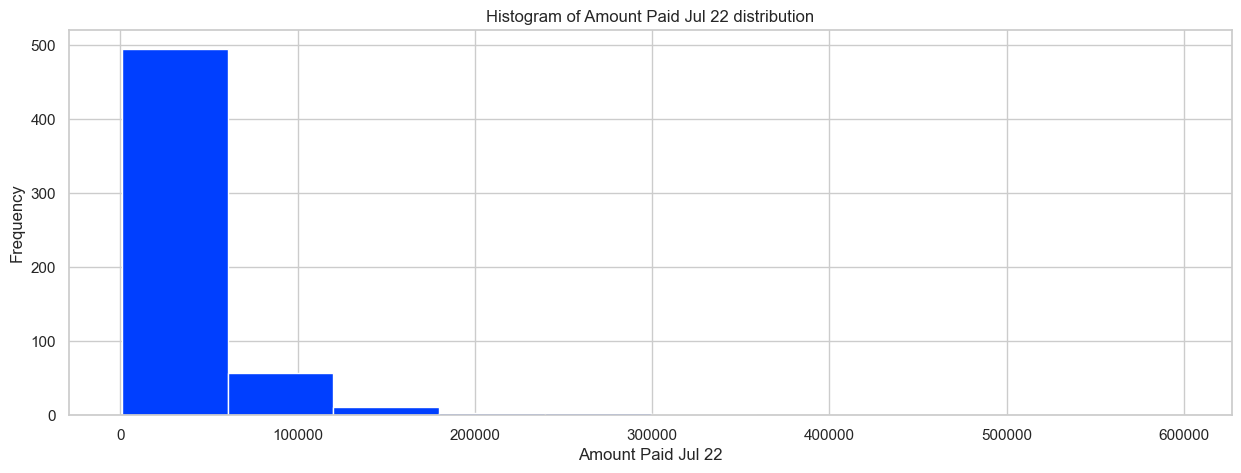

In [64]:

import matplotlib.pyplot as plt

plt.hist(df['Amount Paid Jul 22'])
plt.title('Histogram of Amount Paid Jul 22 distribution')
plt.xlabel('Amount Paid Jul 22')
plt.ylabel('Frequency')
plt.show()

#### 3.3 Kernel Density Estimate (KDE) plot

What is the distribution/concetration of data in our dataset?   |   What was the variation from the mean?

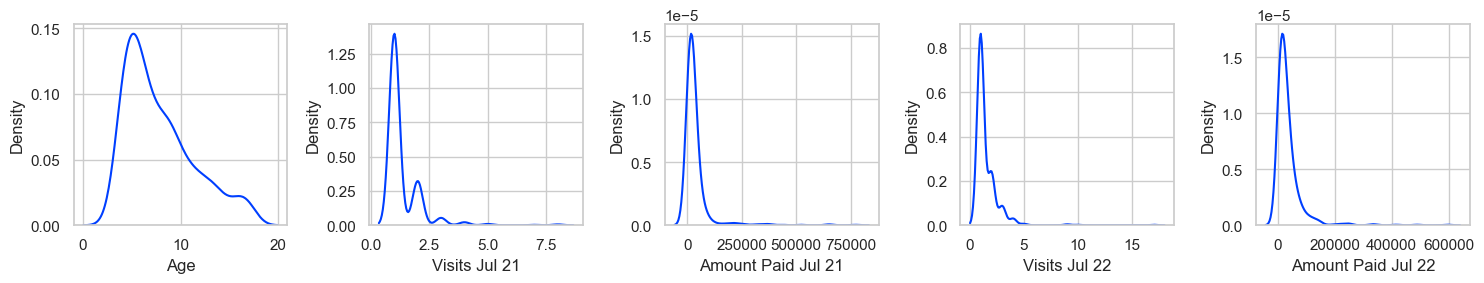

In [66]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

#### 3.4 Histplot

What is the distribution/concetration of data in our dataset?   |   What was the variation from the mean?

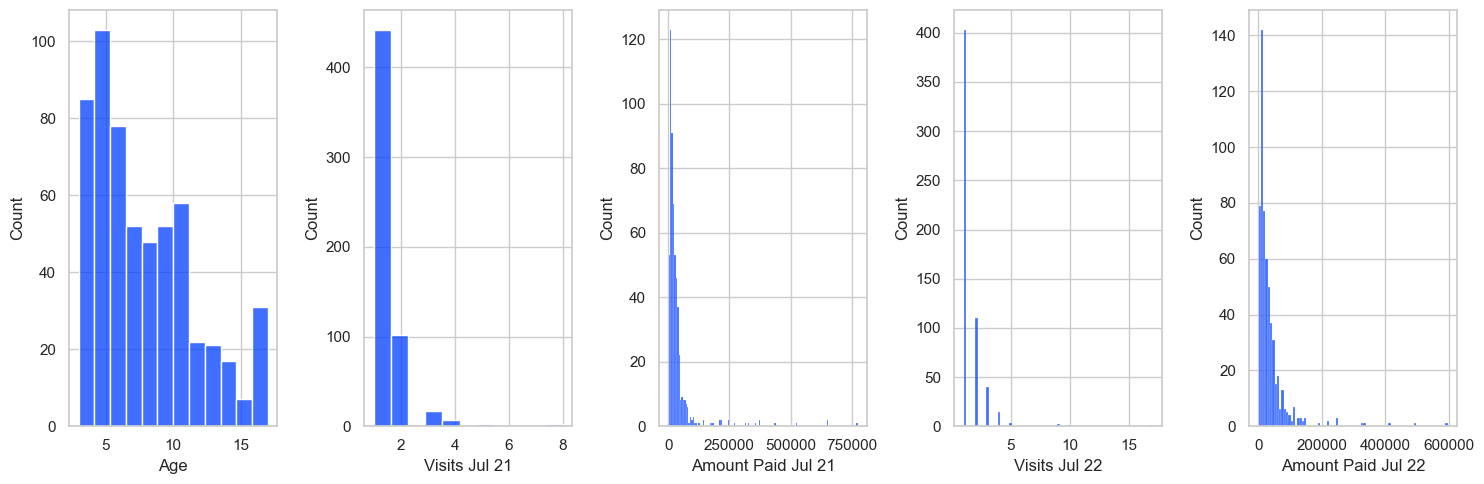

In [67]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

#### 4. Multivariate Analysis & Data Interaction!

#### 4.1 Heatmap Data correlation

Heatmap Correlation |  what the linear relatioship between the data variables in the dataset?

<AxesSubplot: >

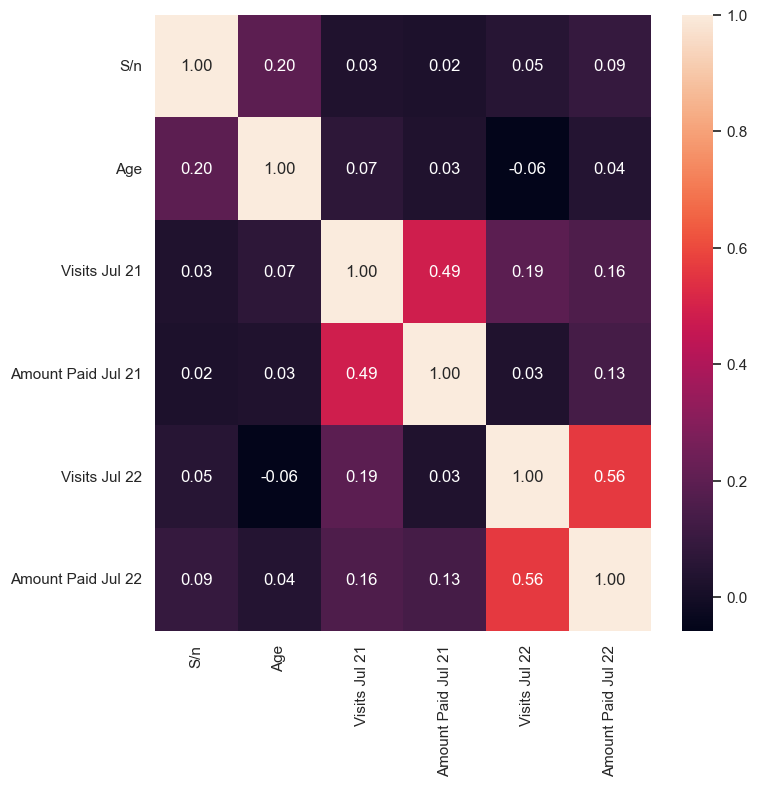

In [73]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### 4.2 Pairplot

What is the visulization of each numerical variable in the dataset?

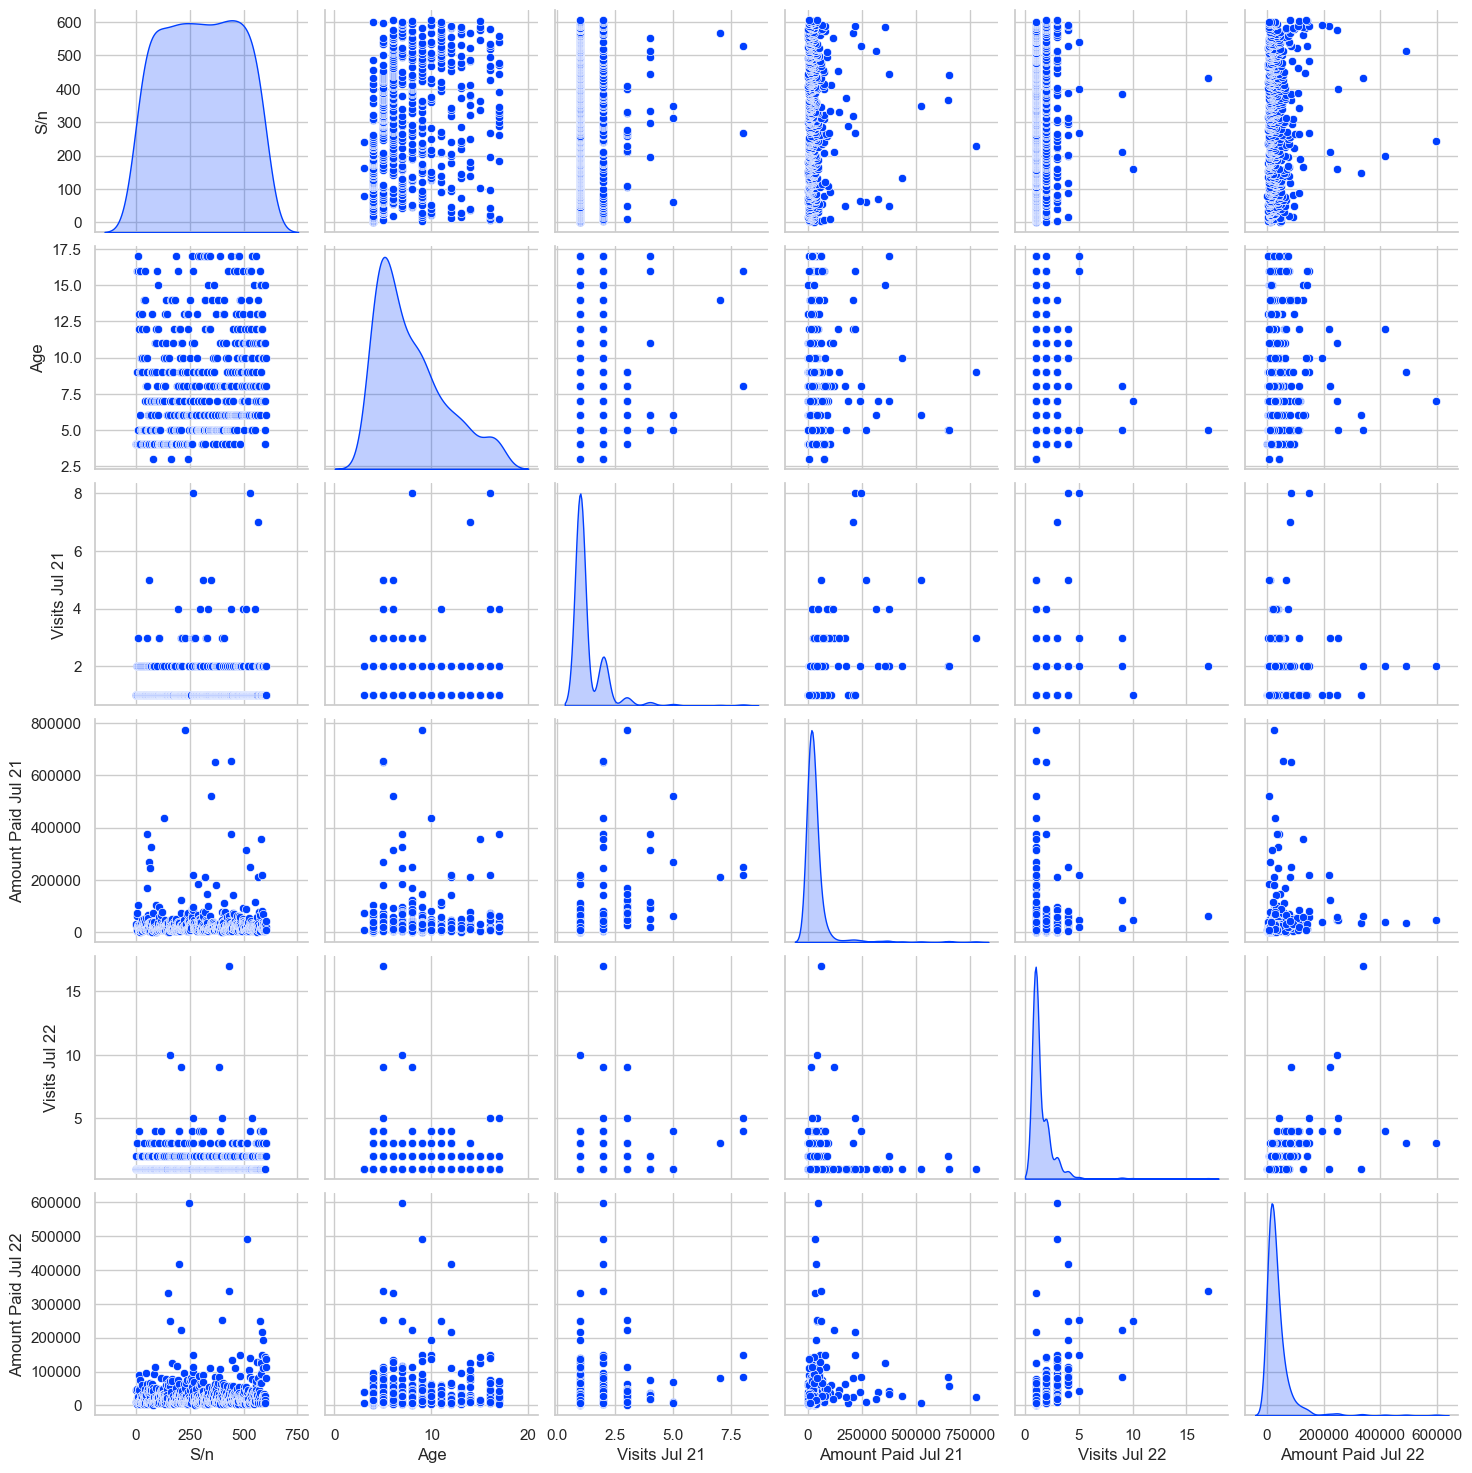

In [74]:
sns.pairplot(df, diag_kind='kde')

#### 4.3 Scatterplot

How much age vs number of visits is scattered in the dataset?

<AxesSubplot: xlabel='Age', ylabel='Visits Jul 21'>

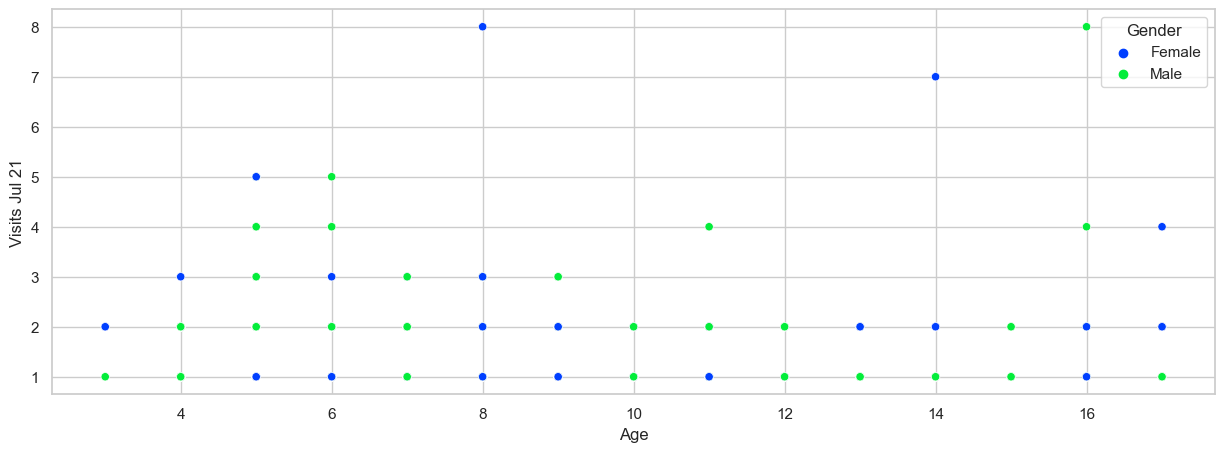

In [76]:
sns.scatterplot(x = 'Age', y = 'Visits Jul 21', hue = 'Gender', data = df)

Comments:
- Most people visits to the health centers most in 1 to 3 times , only few visited to 8 times for 2021.
- Only two children aged 8 and 16 years who visited 8 times to the health centers.

How much age vs amount paid in 2021 is scattered in the dataset?

<AxesSubplot: xlabel='Age', ylabel='Amount Paid Jul 21'>

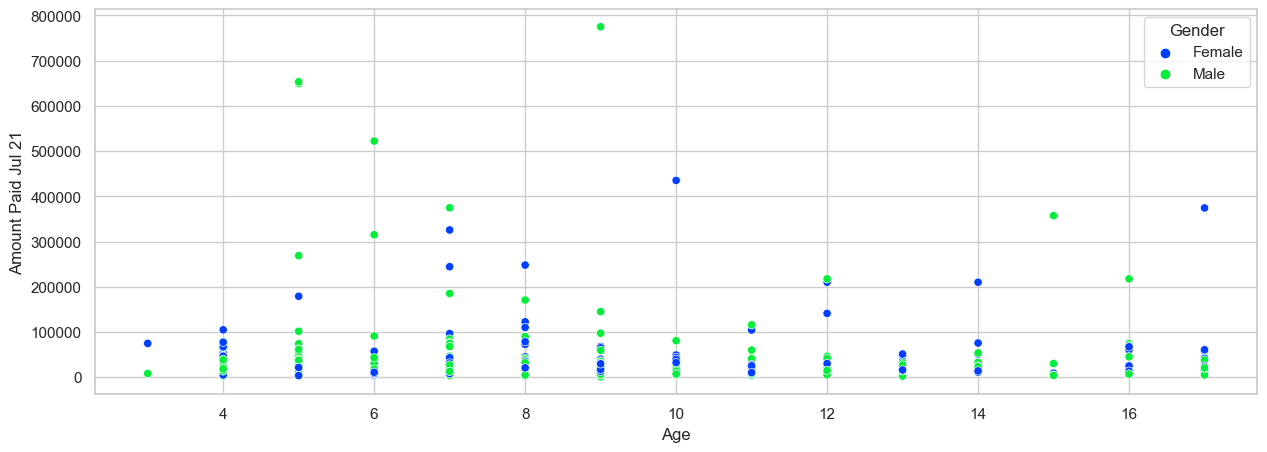

In [77]:
sns.scatterplot(x = 'Age', y = 'Amount Paid Jul 21', hue = 'Gender', data = df)

How much age vs number of visits in 2022 is scattered in the dataset?

<AxesSubplot: xlabel='Age', ylabel='Visits Jul 22'>

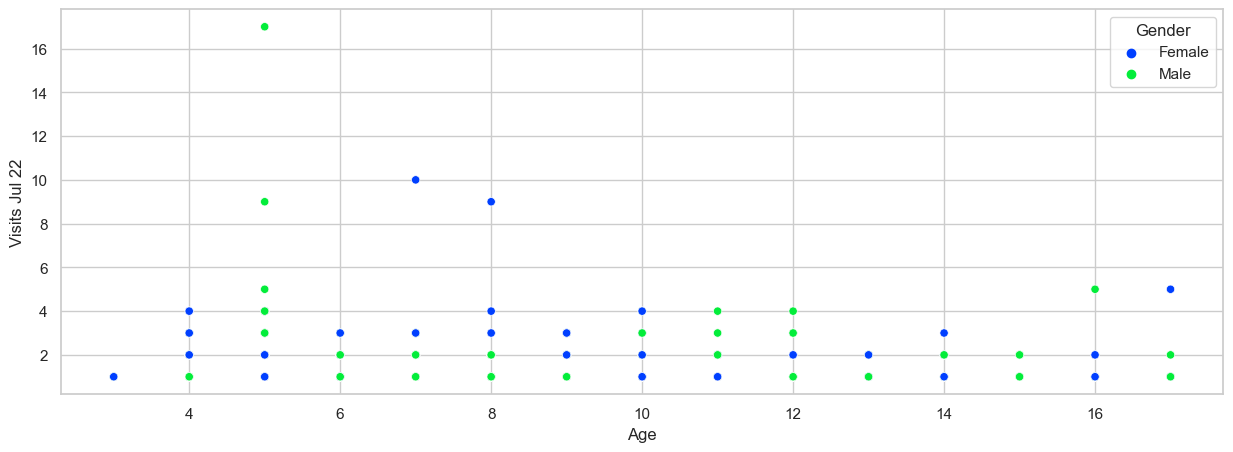

In [78]:
sns.scatterplot(x = 'Age', y = 'Visits Jul 22', hue = 'Gender', data = df)

How much age vs amount paid in 2022 is scattered in the dataset?

<AxesSubplot: xlabel='Age', ylabel='Amount Paid Jul 22'>

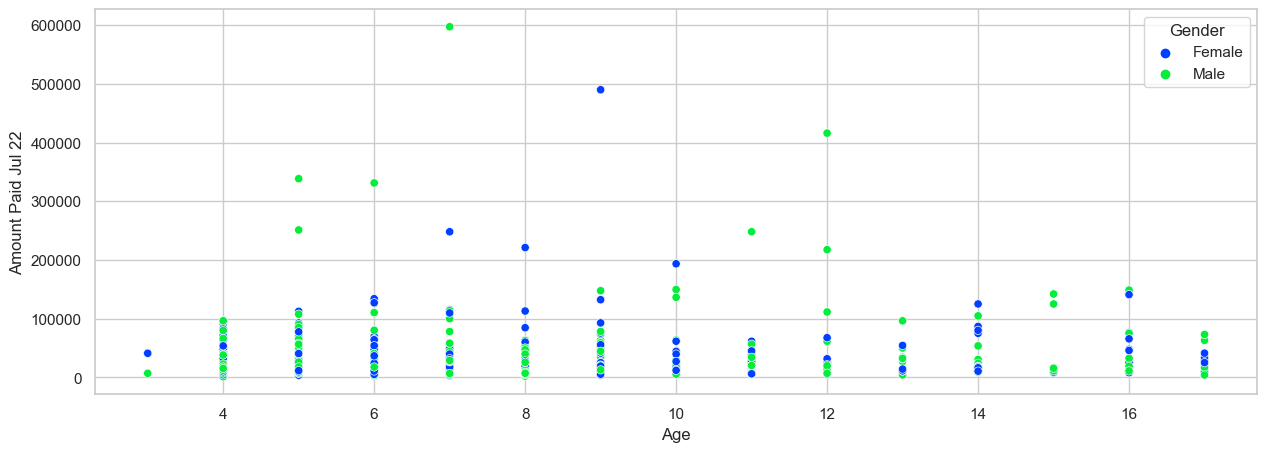

In [79]:
sns.scatterplot(x = 'Age', y = 'Amount Paid Jul 22', hue = 'Gender', data = df)

What is the gender distribution to the amount paid in 2021?

<AxesSubplot: xlabel='Amount Paid Jul 21', ylabel='Gender'>

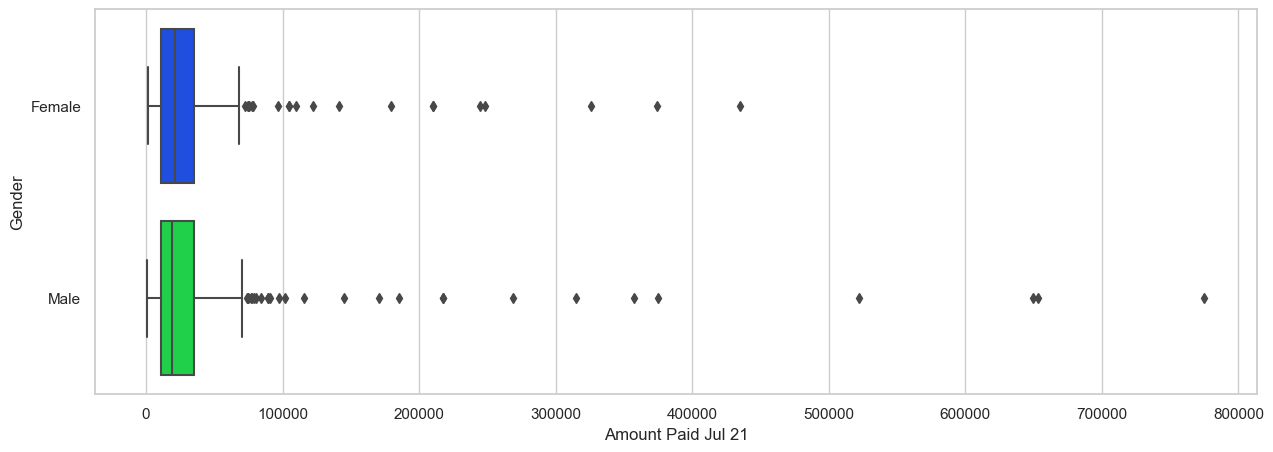

In [85]:
sns.boxplot(x='Amount Paid Jul 21', y='Gender', data=df)

What is the gender distribution to the amount paid in 2022?

<AxesSubplot: xlabel='Amount Paid Jul 22', ylabel='Gender'>

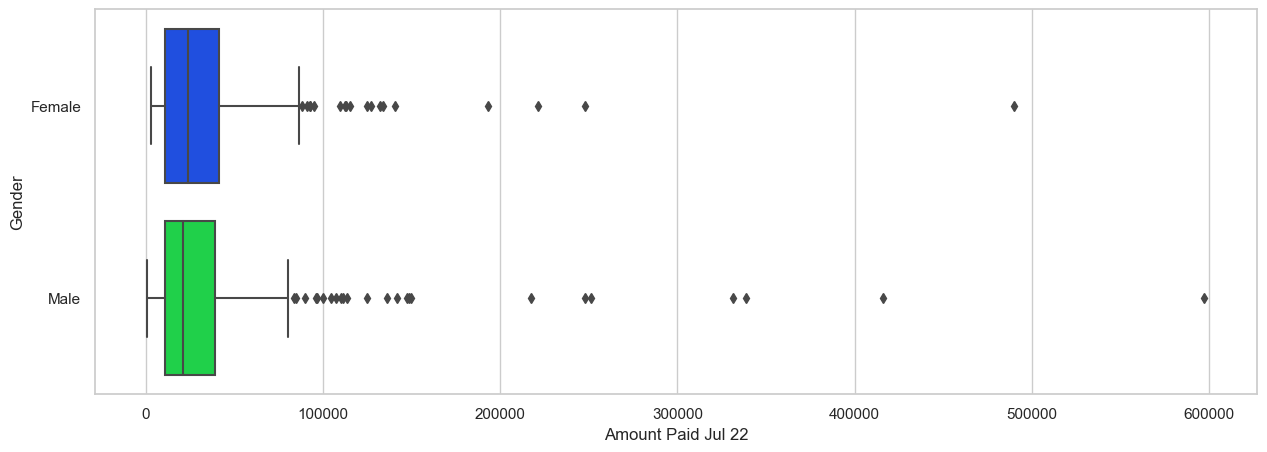

In [86]:
sns.boxplot(x='Amount Paid Jul 22', y='Gender', data=df)

#### 4.4 Barplot

What is the number of the visits against amount paid in 2021?

In [114]:
Visits_VS_Amount21 = df.groupby(['Visits Jul 21']).agg({'Amount Paid Jul 21' : sum}).reset_index()
Visits_VS_Amount21.sort_values(['Amount Paid Jul 21'], ascending = False)

,Visits Jul 21,Amount Paid Jul 21
0,1,9319230
1,2,6940140
2,3,2085960
3,4,1066740
4,5,853000
6,8,465410
5,7,210000


Barplot Charges per Region

what is the contribution of each number of visits for amount paid in 2021?

<AxesSubplot: xlabel='Visits Jul 21', ylabel='Amount Paid Jul 21'>

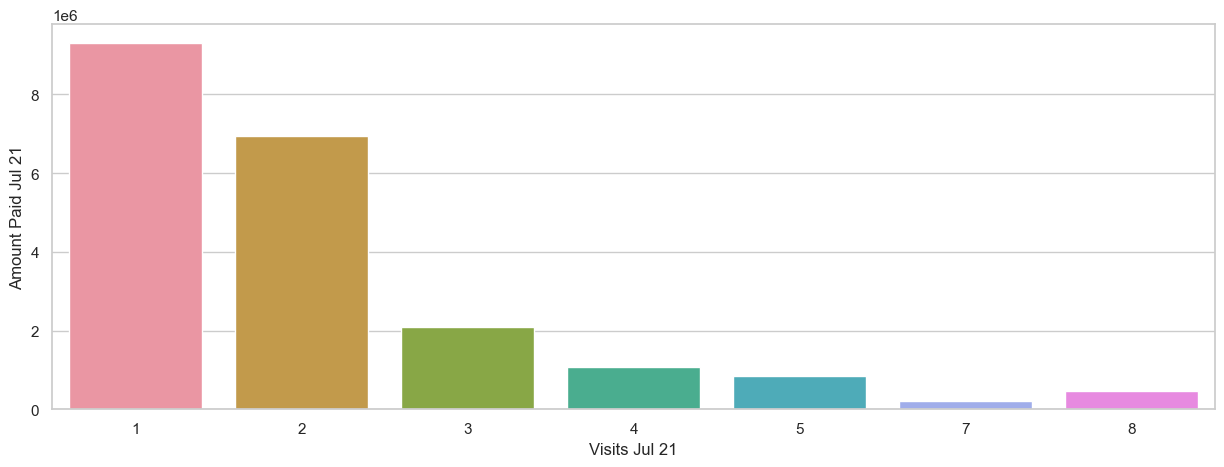

In [115]:
sns.barplot(x = 'Visits Jul 21', y ='Amount Paid Jul 21', data = Visits_VS_Amount21)

What is the contribution of each number of visits to the amount paid in 2022?

In [104]:
Visits_VS_Amount22 = df.groupby(['Visits Jul 22']).agg({'Amount Paid Jul 22' : sum}).reset_index()
Visits_VS_Amount22.sort_values(['Amount Paid Jul 22'], ascending = False)

,Visits Jul 22,Amount Paid Jul 22
0,1,8937165
1,2,4762115
2,3,3684485
3,4,1808105
4,5,440870
7,17,338445
5,9,305930
6,10,248000


Visulization of the contribution of each number of visits to the amount paid in 2022?

<AxesSubplot: xlabel='Visits Jul 22', ylabel='Amount Paid Jul 22'>

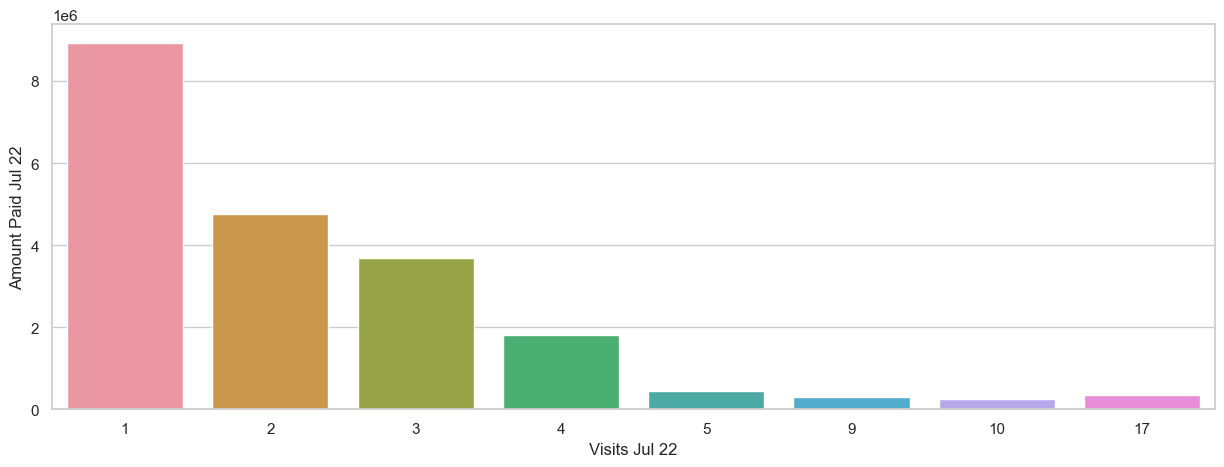

In [112]:
sns.barplot(x = 'Visits Jul 22', y ='Amount Paid Jul 22', data = Visits_VS_Amount22)

What is the contribution of each number of visits to the amount paid in 2021 classified in the age group?

<AxesSubplot: xlabel='Visits Jul 21', ylabel='Amount Paid Jul 21'>

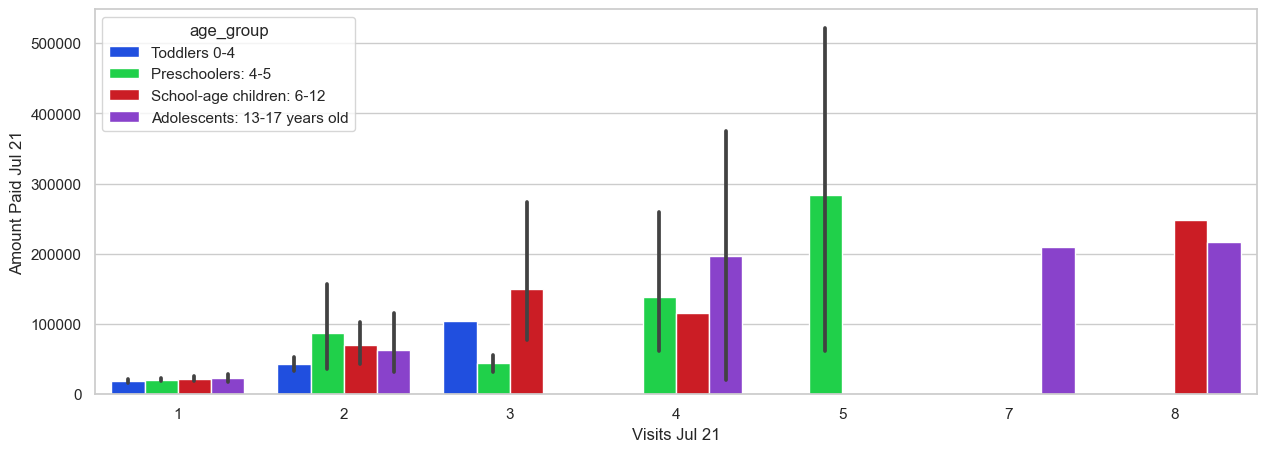

In [ ]:
sns.barplot(x = df['Visits Jul 21'], y = df['Amount Paid Jul 21'], hue = df['age_group'], data = df)

What is the contribution of each number of visits to the amount paid in 2021 classified in the gender?

In [106]:

Visits_VS_Gender = df.groupby(['Visits Jul 21', 'Gender']).agg({'Amount Paid Jul 21' : 'count'}).reset_index()
Visits_VS_Gender.columns = ['Visits Jul 21', 'Gender', 'count']
Visits_VS_Gender.sort_values(['Visits Jul 21', 'count'], ascending = False)

,Visits Jul 21,Gender,count
11,8,Female,1
12,8,Male,1
10,7,Female,1
9,5,Male,2
8,5,Female,1
7,4,Male,6
6,4,Female,1
5,3,Male,10
4,3,Female,7
2,2,Female,53


Visulization of contribution of each number of visits to the amount paid in 2021 classified in the gender?

<AxesSubplot: xlabel='Gender', ylabel='count'>

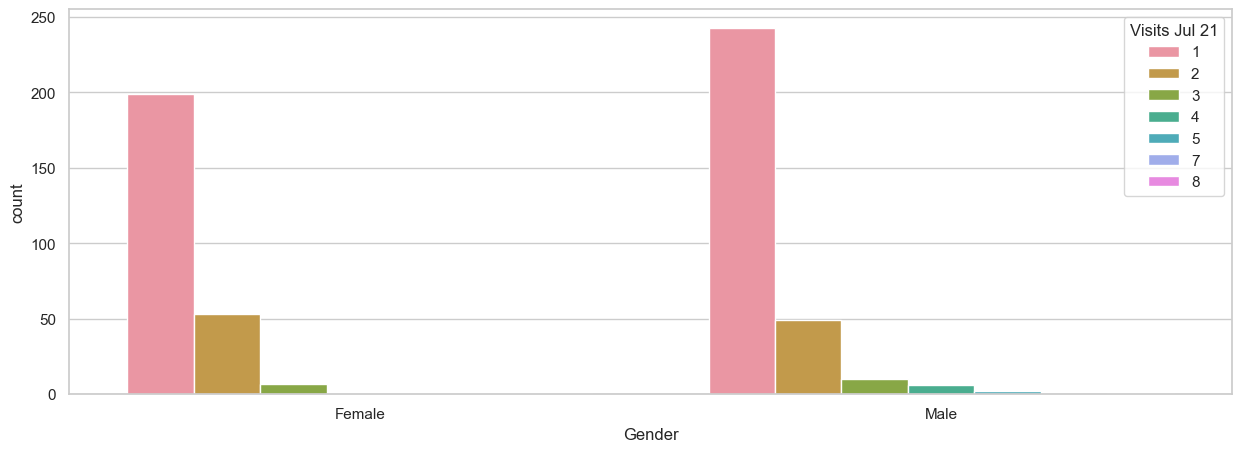

In [107]:

sns.barplot(x = Visits_VS_Gender['Gender'], y = Visits_VS_Gender['count'], hue = Visits_VS_Gender['Visits Jul 21'], data = Visits_VS_Gender)

### 5.0 

### 6. Preprocessing the data (Data cleaning, Feature Transformation, Feature Scaling (Normalization))

#### 6.1 Missing Value

In [ ]:
df.isna().sum()

There are no missing value

#### 6.2 Duplicate Value

In [ ]:
df.duplicated().sum()

In [ ]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

There are no duplicate value.

In [ ]:
df

In [ ]:
# Creating a Copy DataFrame
dfori = df.copy()

### 7.0 Create a profiling report of analysed data!

In [ ]:
# Importing the necessary modules
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating an instance of Profile_Report
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [ ]:
profile.to_file("Reports/Pandas_Profiling_output.html")

### 8. Conclusion

8.1 The insights drawn by performing `Exploratory Data Analysis` (EDA) are:

- 
- 
- 
-
-


### 8.2 Limitations

### 8.3 Future Recommendations.